In [32]:
import dask.dataframe as dd

In [57]:
NUM_OF_JUNCTIONS = 5
ROLLING_WINDOW_LENGTH = 300
TRAVEL_TIME_WINDOW = 300
TRAFFIC_DATASET = "/home/local/ASUAD/speddira/dev/streaming-data-city-scale-incident-detection/datasets/trafficDataset_2024-2-16_1915hours_2592000steps.csv"
VEHICLE_DATASET = "/home/local/ASUAD/speddira/dev/streaming-data-city-scale-incident-detection/datasets/vehicleDataset_2024-2-16_1915hours_2592000steps.csv"
LENGTH_OF_SIM = 2_592_000
generate_incidents_csv = False

In [34]:
print(f"Number of junctions considered for dataset prep: {NUM_OF_JUNCTIONS}")
print(f"Rolling window length considered for dataset prep: {ROLLING_WINDOW_LENGTH}")
print(f"Travel time window length considered for dataset prep: {TRAVEL_TIME_WINDOW}")

Number of junctions considered for dataset prep: 5
Rolling window length considered for dataset prep: 300
Travel time window length considered for dataset prep: 300


In [36]:
dtype = {
    'step' : 'int64',
    'time_of_day' : 'int64',
    'identified_edge' : 'object',
    'junction_mean_speed' : 'float64',
    'traffic_count' : 'float64',
    'traffic_occupancy' : 'float64',
    'vehicles_per_lane_1' : 'int64',
    'vehicles_per_lane_0' : 'int64',
    'lane_mean_speed_0' : 'float64',
    'lane_mean_speed_1' : 'float64',
    'incident_edge': 'object',
    'incident_start_time': 'float64',
    'incident_type': 'object',
    'accident_label': 'bool',
    'accident_id': 'object',
    'accident_duration': 'float64',
    'incident_lane': 'object'
}
df_traffic = dd.read_csv(TRAFFIC_DATASET,dtype=dtype,blocksize=150e6)

In [37]:
num_partitions = df_traffic.npartitions
print(f'Number of partitions: {num_partitions}')

Number of partitions: 88


In [38]:
if(generate_incidents_csv):
    print("Generating incidents csv")
    df_incidents_info = df_traffic[df_traffic["accident_label"]][["incident_edge", "incident_type", 'incident_start_time',"accident_duration", "incident_lane"]]

    df_incidents_info2 = df_incidents_info.groupby("incident_start_time").first().reset_index()

    print("Getting head of incidents dataset")

    print(df_incidents_info2.head())

    df_pandas_incidents =  df_incidents_info2.compute()

    df_pandas_incidents.to_csv("incidents_data.csv")

    print(f"Number of incidents in this simulation {len(df_pandas_incidents)}")
    print(f"Number of incidents in this simulation with less severe incidents {len(df_pandas_incidents[df_pandas_incidents['incident_type']=='stalled_vehicle'])}")
    print(f"Number of incidents in this simulation with more severe incidents {len(df_pandas_incidents[df_pandas_incidents['incident_type']=='multi_vehicle_collision'])}")

    print(f"Input traffic raw data shape is {df_traffic.shape}")

In [39]:
df_traffic = df_traffic.drop(["vehicles_per_lane_1","vehicles_per_lane_0","lane_mean_speed_0","lane_mean_speed_1"],axis=1)

In [40]:

if NUM_OF_JUNCTIONS == 3:
    print(f" Number of junctions considered 3")
    incoming_edges = ["436794680#0","436791113#0","-436942381#3","533371302#0","436942374","436790491","436943750#0","436943762#0"]
    outgoing_edges = ["533573776#0","5607328#0","436942381#0","436790495","-1033824750","30031286#0","436943743#0","-436943762#2"]
    
elif NUM_OF_JUNCTIONS == 4:
    print(f" Number of junctions considered 4")
    incoming_edges = ["436794680#0","436791113#0","-436942381#3","533371302#0","436942374","436790491","436943750#0","-643913497","436940278","436943762#0"]
    outgoing_edges = ["533573776#0","5607328#0","436942381#0","436790495","-1033824750","30031286#0","436943743#0","-436943762#2","436940270","519448767"]
    
elif NUM_OF_JUNCTIONS == 5:
    print(f" Number of junctions considered 5")
    incoming_edges = ["436794680#0","436791113#0","-436942381#3","533371302#0","436942374","436790491","436943750#0","-643913497","436940278","436943762#0","436794669","436942357"]
    outgoing_edges = ["533573776#0","5607328#0","436942381#0","436790495","-1033824750","30031286#0","436943743#0","-436943762#2","436940270","519448767","-436794676#1","531969915#0"]
    
elif NUM_OF_JUNCTIONS == 6:
    print(f" Number of junctions considered 6")
    incoming_edges = ["436794680#0","436791113#0","-436942381#3","533371302#0","436942374","436790491","436943750#0","-643913497","436940278","436943762#0","436794669","436942357","-436942356#1","436942362#0","436789580#1"]
    outgoing_edges = ["533573776#0","5607328#0","436942381#0","436790495","-1033824750","30031286#0","436943743#0","-436943762#2","436940270","519448767","-436794676#1","531969915#0","436942356#0","-436942362#3","436789564#0"]
    
elif NUM_OF_JUNCTIONS == 7:
    print(f" Number of junctions considered 7")
    incoming_edges = ["436794680#0","436791113#0","-436942381#3","533371302#0","436942374","436790491","436943750#0","-643913497","436940278","436943762#0","436794669","436942357","-436942356#1","436942362#0","436789580#1","436794670","1051038541#0","-436794679#3"]
    outgoing_edges = ["533573776#0","5607328#0","436942381#0","436790495","-1033824750","30031286#0","436943743#0","-436943762#2","436940270","519448767","-436794676#1","531969915#0","436942356#0","-436942362#3","436789564#0","A-1088637809#1","A436942385#0","A436794679#0"]
    
elif NUM_OF_JUNCTIONS == 8:
    print(f" Number of junctions considered 8")
    incoming_edges = ["436794680#0","436791113#0","-436942381#3","533371302#0","436942374","436790491","436943750#0","-643913497","436940278","436943762#0","436794669","436942357","-436942356#1","436942362#0","436789580#1","436794670","1051038541#0","-436794679#3","436943745#0","351673438","-613687451#1"]
    outgoing_edges = ["533573776#0","5607328#0","436942381#0","436790495","-1033824750","30031286#0","436943743#0","-436943762#2","436940270","519448767","-436794676#1","531969915#0","436942356#0","-436942362#3","436789564#0","-1088637809#1","436942385#0","436794679#0","-436943745#2","436943742","436943774"]
    

else:
    print(f" Number of junctions considered {NUM_OF_JUNCTIONS}")
    print("Entered too many sensors resorting to 8 sensors")
    incoming_edges = ["436794680#0","436791113#0","-436942381#3","533371302#0","436942374","436790491","436943750#0","-643913497","436940278","436943762#0","436794669","436942357","-436942356#1","436942362#0","436789580#1","436794670","1051038541#0","-436794679#3","436943745#0","351673438","-613687451#1"]
    outgoing_edges = ["533573776#0","5607328#0","436942381#0","436790495","-1033824750","30031286#0","436943743#0","-436943762#2","436940270","519448767","-436794676#1","531969915#0","436942356#0","-436942362#3","436789564#0","-1088637809#1","436942385#0","436794679#0","-436943745#2","436943742","436943774"]
    

 Number of junctions considered 5


In [41]:
edges = incoming_edges + outgoing_edges

In [42]:
count = 0
df = df_traffic[df_traffic["identified_edge"] == edges[0] ]
df = df.reset_index(drop=True)
df[f"rolling_junction_mean_speed_{count}"] = df['junction_mean_speed'].rolling(ROLLING_WINDOW_LENGTH).mean()
df[f"rolling_traffic_occupancy_{count}"] = df['traffic_occupancy'].rolling(ROLLING_WINDOW_LENGTH).mean()
df[f"rolling_traffic_count_{count}"] = df['traffic_count'].rolling(ROLLING_WINDOW_LENGTH).mean()

Y = df[["step","time_of_day","incident_edge","incident_start_time","incident_type","accident_id","accident_duration","incident_lane","accident_label"]]
df_data = df[["step",f"rolling_junction_mean_speed_{count}",f"rolling_traffic_count_{count}",f"rolling_traffic_occupancy_{count}"]]
count+=1

In [43]:
a = df.shape

print("Shape so far",a[0].compute(),a[1])

Shape so far 2592000 16


In [44]:
for index,edge in enumerate(edges):
    
    if index == 0:
        continue
    print(f"Processed {count}")
    df = df_traffic[df_traffic["identified_edge"] == edge ]
    df = df.reset_index(drop=True)
    df[f"rolling_junction_mean_speed_{count}"] = df['junction_mean_speed'].rolling(ROLLING_WINDOW_LENGTH).mean()
    df[f"rolling_traffic_count_{count}"] = df['traffic_count'].rolling(ROLLING_WINDOW_LENGTH).mean()
    df[f"rolling_traffic_occupancy_{count}"] = df['traffic_occupancy'].rolling(ROLLING_WINDOW_LENGTH).mean()
    
    df_temp = df[["step",f"rolling_junction_mean_speed_{count}",f"rolling_traffic_count_{count}",f"rolling_traffic_occupancy_{count}"]]
    df_data = dd.merge(left = df_data, right = df_temp , on = "step", how = "inner")

    count+=1
    

Processed 1
Processed 2
Processed 3
Processed 4
Processed 5
Processed 6
Processed 7
Processed 8
Processed 9
Processed 10
Processed 11
Processed 12
Processed 13
Processed 14
Processed 15
Processed 16
Processed 17
Processed 18
Processed 19
Processed 20
Processed 21
Processed 22
Processed 23


In [45]:
df_traffic_data = dd.merge(left = df_data, right = Y , on = "step", how = "inner")

In [46]:
print("Persisting data so far checkpoint 1")
df_traffic_data = df_traffic_data.persist()

Persisting data so far checkpoint 1


In [47]:
a = df_traffic_data.shape

print("Shape so far",a[0].compute(),a[1])

Shape so far 2592000 81


In [ ]:
# Dealing with Vehicle data

In [48]:
dtype = {
'step':'int64',
'time_of_day':'int64',
'car_id':'object',
'identified_edge':'object',
'identified_lane':'float64',
'junction_mean_speed':'float64',
'vehicle_speed':'float64',
'vehicle_acceleration':'float64'
}
df_vehicle = dd.read_csv(VEHICLE_DATASET,dtype=dtype)

In [49]:

if NUM_OF_JUNCTIONS == 3:
    print(f" Number of junctions considered 3")
    incoming_edges = ["436794680#0","436791113#0","-436942381#3","533371302#0","436942374","436790491","436943750#0","436943762#0"]
    outgoing_edges = ["533573776#0","5607328#0","436942381#0","436790495","-1033824750","30031286#0","436943743#0","-436943762#2"]
    
elif NUM_OF_JUNCTIONS == 4:
    print(f" Number of junctions considered 4")
    incoming_edges = ["436794680#0","436791113#0","-436942381#3","533371302#0","436942374","436790491","436943750#0","-643913497","436940278","436943762#0"]
    outgoing_edges = ["533573776#0","5607328#0","436942381#0","436790495","-1033824750","30031286#0","436943743#0","-436943762#2","436940270","519448767"]
    
elif NUM_OF_JUNCTIONS == 5:
    print(f" Number of junctions considered 5")
    incoming_edges = ["436794680#0","436791113#0","-436942381#3","533371302#0","436942374","436790491","436943750#0","-643913497","436940278","436943762#0","436794669","436942357"]
    outgoing_edges = ["533573776#0","5607328#0","436942381#0","436790495","-1033824750","30031286#0","436943743#0","-436943762#2","436940270","519448767","-436794676#1","531969915#0"]
    
elif NUM_OF_JUNCTIONS == 6:
    print(f" Number of junctions considered 6")
    incoming_edges = ["436794680#0","436791113#0","-436942381#3","533371302#0","436942374","436790491","436943750#0","-643913497","436940278","436943762#0","436794669","436942357","-436942356#1","436942362#0","436789580#1"]
    outgoing_edges = ["533573776#0","5607328#0","436942381#0","436790495","-1033824750","30031286#0","436943743#0","-436943762#2","436940270","519448767","-436794676#1","531969915#0","436942356#0","-436942362#3","436789564#0"]
    
elif NUM_OF_JUNCTIONS == 7:
    print(f" Number of junctions considered 7")
    incoming_edges = ["436794680#0","436791113#0","-436942381#3","533371302#0","436942374","436790491","436943750#0","-643913497","436940278","436943762#0","436794669","436942357","-436942356#1","436942362#0","436789580#1","436794670","1051038541#0","-436794679#3"]
    outgoing_edges = ["533573776#0","5607328#0","436942381#0","436790495","-1033824750","30031286#0","436943743#0","-436943762#2","436940270","519448767","-436794676#1","531969915#0","436942356#0","-436942362#3","436789564#0","A-1088637809#1","A436942385#0","A436794679#0"]
    
elif NUM_OF_JUNCTIONS == 8:
    print(f" Number of junctions considered 8")
    incoming_edges = ["436794680#0","436791113#0","-436942381#3","533371302#0","436942374","436790491","436943750#0","-643913497","436940278","436943762#0","436794669","436942357","-436942356#1","436942362#0","436789580#1","436794670","1051038541#0","-436794679#3","436943745#0","351673438","-613687451#1"]
    outgoing_edges = ["533573776#0","5607328#0","436942381#0","436790495","-1033824750","30031286#0","436943743#0","-436943762#2","436940270","519448767","-436794676#1","531969915#0","436942356#0","-436942362#3","436789564#0","-1088637809#1","436942385#0","436794679#0","-436943745#2","436943742","436943774"]
    

else:
    print(f" Number of junctions considered {NUM_OF_JUNCTIONS}")
    print("Entered too many sensors resorting to 8 sensors")
    incoming_edges = ["436794680#0","436791113#0","-436942381#3","533371302#0","436942374","436790491","436943750#0","-643913497","436940278","436943762#0","436794669","436942357","-436942356#1","436942362#0","436789580#1","436794670","1051038541#0","-436794679#3","436943745#0","351673438","-613687451#1"]
    outgoing_edges = ["533573776#0","5607328#0","436942381#0","436790495","-1033824750","30031286#0","436943743#0","-436943762#2","436940270","519448767","-436794676#1","531969915#0","436942356#0","-436942362#3","436789564#0","-1088637809#1","436942385#0","436794679#0","-436943745#2","436943742","436943774"]
    

 Number of junctions considered 5


In [50]:
# sensor details

sensors = {

    1: "5607328#0",
    2:"436791113#0",
    3:"533573776#0",
    4:"436794680#0",
    5:"436794670",
    6:"436942385#0",
    7:"1051038541#0",
    8:"436794679#0",
    9:"-436794679#3",
    10:"-1088637809#1",
    11:"436794669",
    12:"531969915#0",
    13:"436942357",
    14:"-436794676#1",
    15:"436790495",
    16:"533371302#0",
    17:"-1033824750",
    18:"436942374",
    19:"30031286#0",
    20:"436790491",
    21:"436942381#0",
    22:"-436942381#3",
    23:"436789580#1",
    24:"436942356#0",
    25:"-436942356#1",
    26:"-436942362#3",
    27:"436942362#0",
    28:"436789564#0",
    29:"436940278",
    30:"436940270",
    31:"-643913497",
    32:"519448767",
    33:"436943745#0",
    34:"436943742",
    35:"351673438",
    36:"436943774",
    37:"-613687451#1",
    38:"-436943745#2",
    39:"436943750#0",
    40:"-436943762#2",
    41:"436943762#0",
    42:"436943743#0"

}

In [51]:
junctions_sensor_combo ={

    3:[[3,22],[21,4],[1,16],[15,2],[40,20],[19,41],[42,18],[17,39],[3,41],[42,2],[1,39],[40,4]],

    4:[[3,22],[21,4],[1,16],[15,2],[40,20],[19,41],[42,18],[17,39],[3,41],[42,31],[30,39],[40,4],[32,2],[1,29],[32,16],[15,29],[30,18],[17,31]],
    
    5:[[3,11],[14,4],[30,39],[42,31],[32,2],[1,29],[40,13],[12,41],[3,22],[14,22],[21,4],[21,11],[1,16],[15,2],[19,13],[12,20],[32,16],[15,29],[30,18],[17,31],[17,39],[42,18],[19,41],[40,20]],

    6:[[3,11],[14,4],[30,39],[42,31],[32,2],[1,29],[26,13],[12,27],[40,25],[24,41],[3,22],[14,22],[21,4],[21,11],[1,16],[15,2],[19,23],[28,20],[32,16],[15,29],[30,18],[17,31],[17,39],[42,18]],

    7:[[3,5],[10,4],[8,11],[14,9],[30,39],[42,31],[32,2],[1,29],[26,13],[12,27],[40,25],[24,41],[6,22],[21,7],[1,16],[15,2],[19,23],[28,20],[32,16],[15,29],[30,18],[17,31],[17,39],[42,18]],

    8:[[3,5],[10,4],[8,11],[14,9],[30,33],[38,31],[34,39],[42,35],[32,2],[1,29],[26,13],[12,27],[40,25],[24,41],[6,22],[21,7],[1,16],[15,2],[19,23],[28,20],[32,16],[15,29],[36,18],[17,37]]

}

In [52]:
interested_combo = junctions_sensor_combo[NUM_OF_JUNCTIONS]

In [56]:
print(interested_combo)
print(len(interested_combo))

[[3, 11], [14, 4], [30, 39], [42, 31], [32, 2], [1, 29], [40, 13], [12, 41], [3, 22], [14, 22], [21, 4], [21, 11], [1, 16], [15, 2], [19, 13], [12, 20], [32, 16], [15, 29], [30, 18], [17, 31], [17, 39], [42, 18], [19, 41], [40, 20]]
24


In [58]:
steps = [i for i in range(LENGTH_OF_SIM)]
data_dd = {"steps":steps}
dd_dataframe = dd.from_dict(data_dd,npartitions = 2)

In [59]:
count = 1
for sensor_combination in interested_combo:
    print(count)
    outgoing_sensor = sensors[sensor_combination[0]]
    incoming_sensor = sensors[sensor_combination[1]]
    df_outgoing = df_vehicle[df_vehicle['identified_edge'] == outgoing_sensor]
    df_incoming = df_vehicle[df_vehicle['identified_edge'] == incoming_sensor]
    df_incoming = df_incoming.reset_index(drop=True)
    df_outgoing = df_outgoing.reset_index(drop=True)

    df_outgoing_unique = df_outgoing[df_outgoing["car_id"].notnull()]
    df_incoming_unique = df_incoming[df_incoming["car_id"].notnull()]

    df_outgoing_unique = df_outgoing_unique.groupby('car_id').first().reset_index()
    df_incoming_unique = df_incoming_unique.groupby('car_id').first().reset_index()

    df_outgoing_unique = df_outgoing_unique.sort_values(by = 'step')
    df_incoming_unique = df_incoming_unique.sort_values(by = 'step')
    
    df_merged = dd.merge(left = df_incoming_unique,right = df_outgoing_unique, on='car_id', how='inner')

    df_merged["travel_time"] = df_merged["step_x"] - df_merged["step_y"]

    df_travel_time_data = df_merged[["step_x","travel_time"]]

    
    df_travel_time_data2 = dd.merge(left = df_travel_time_data,right = dd_dataframe, right_on='steps',left_on="step_x", how='right')

    df_travel_time_data2[f"rolling_travel_time_{sensor_combination[0]}_{sensor_combination[1]}"] = df_travel_time_data2["travel_time"].rolling(300,min_periods=1).mean()

    df_travel_time_data2 = df_travel_time_data2.drop(["step_x","travel_time"],axis=1)
    df_traffic_data = dd.merge(left = df_traffic_data, right = df_travel_time_data2 , left_on = "step",right_on = "steps", how = "inner")
    df_traffic_data = df_traffic_data.drop(["steps"],axis=1)
    df_traffic_data = df_traffic_data.persist()
    count+=1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [93]:
print(f"Traffic data shape after adding travel times {df_traffic_data.shape}")

Traffic data shape after adding travel times (Delayed('int-a7f9b7b8-f225-4af6-af85-87afd89e95e7'), 105)


In [94]:
df_final_dataset = df_traffic_data.compute()

In [52]:
df_final_dataset.to_csv("Dataset.csv")

In [95]:
df_final_dataset.head()

,step,rolling_junction_mean_speed_0,rolling_traffic_count_0,rolling_traffic_occupancy_0,rolling_junction_mean_speed_1,rolling_traffic_count_1,rolling_traffic_occupancy_1,rolling_junction_mean_speed_2,rolling_traffic_count_2,rolling_traffic_occupancy_2,...,rolling_travel_time_19_13,rolling_travel_time_12_20,rolling_travel_time_32_16,rolling_travel_time_15_29,rolling_travel_time_30_18,rolling_travel_time_17_31,rolling_travel_time_17_39,rolling_travel_time_42_18,rolling_travel_time_19_41,rolling_travel_time_40_20
0,299,1.357526,0.190000,0.003382,0.778788,0.423333,0.021093,4.507942,2.323333,0.038188,...,NaN,NaN,NaN,NaN,152.0,NaN,NaN,NaN,NaN,NaN
1,300,1.383737,0.196667,0.003500,0.812956,0.430000,0.021515,4.507942,2.323333,0.038188,...,NaN,NaN,NaN,NaN,152.0,NaN,NaN,NaN,NaN,NaN
2,301,1.409860,0.203333,0.003618,0.842962,0.440000,0.022003,4.507942,2.323333,0.038188,...,NaN,NaN,NaN,NaN,152.0,NaN,NaN,NaN,NaN,NaN
3,302,1.435945,0.210000,0.003736,0.870705,0.453333,0.022642,4.507942,2.323333,0.038188,...,NaN,NaN,NaN,NaN,152.0,NaN,NaN,NaN,NaN,NaN
4,303,1.462029,0.216667,0.003854,0.896841,0.466667,0.023229,4.507942,2.323333,0.038188,...,NaN,NaN,NaN,NaN,152.0,NaN,NaN,NaN,NaN,NaN


In [96]:
df_final_dataset.tail()

,step,rolling_junction_mean_speed_0,rolling_traffic_count_0,rolling_traffic_occupancy_0,rolling_junction_mean_speed_1,rolling_traffic_count_1,rolling_traffic_occupancy_1,rolling_junction_mean_speed_2,rolling_traffic_count_2,rolling_traffic_occupancy_2,...,rolling_travel_time_19_13,rolling_travel_time_12_20,rolling_travel_time_32_16,rolling_travel_time_15_29,rolling_travel_time_30_18,rolling_travel_time_17_31,rolling_travel_time_17_39,rolling_travel_time_42_18,rolling_travel_time_19_41,rolling_travel_time_40_20
876,1992,5.464566,1.686667,0.030578,4.869743,1.516667,0.073230,9.441729,6.593333,0.108924,...,NaN,NaN,201.333333,194.0,181.266667,NaN,233.307692,252.210526,NaN,NaN
877,1993,5.413651,1.680000,0.030460,4.892093,1.500000,0.072417,9.405492,6.606667,0.109141,...,NaN,NaN,201.333333,194.0,181.266667,NaN,233.307692,252.210526,NaN,NaN
878,1996,5.259849,1.670000,0.030224,4.936793,1.443333,0.069651,9.359537,6.630000,0.109521,...,NaN,NaN,201.333333,194.0,181.266667,NaN,233.307692,248.333333,NaN,NaN
879,1997,5.211285,1.666667,0.030165,4.936793,1.420000,0.068512,9.357603,6.636667,0.109630,...,NaN,NaN,201.333333,194.0,181.266667,NaN,233.307692,248.333333,NaN,NaN
880,1998,5.211285,1.666667,0.030165,4.980689,1.400000,0.067536,9.357772,6.643333,0.109739,...,NaN,NaN,201.333333,194.0,181.266667,NaN,233.307692,248.333333,NaN,NaN


In [39]:
for c in df_final_dataset.columns:
    print(c)

step
rolling_junction_mean_speed_0
rolling_traffic_count_0
rolling_traffic_occupancy_0
rolling_junction_mean_speed_1
rolling_traffic_count_1
rolling_traffic_occupancy_1
rolling_junction_mean_speed_2
rolling_traffic_count_2
rolling_traffic_occupancy_2
rolling_junction_mean_speed_3
rolling_traffic_count_3
rolling_traffic_occupancy_3
rolling_junction_mean_speed_4
rolling_traffic_count_4
rolling_traffic_occupancy_4
rolling_junction_mean_speed_5
rolling_traffic_count_5
rolling_traffic_occupancy_5
rolling_junction_mean_speed_6
rolling_traffic_count_6
rolling_traffic_occupancy_6
rolling_junction_mean_speed_7
rolling_traffic_count_7
rolling_traffic_occupancy_7
rolling_junction_mean_speed_8
rolling_traffic_count_8
rolling_traffic_occupancy_8
rolling_junction_mean_speed_9
rolling_traffic_count_9
rolling_traffic_occupancy_9
rolling_junction_mean_speed_10
rolling_traffic_count_10
rolling_traffic_occupancy_10
rolling_junction_mean_speed_11
rolling_traffic_count_11
rolling_traffic_occupancy_11
rolli

<AxesSubplot:xlabel='step'>

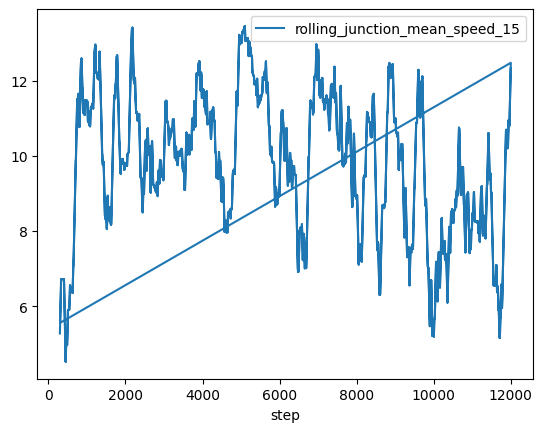

In [61]:
df_final_dataset.plot(x="step",y="rolling_junction_mean_speed_16")

In [62]:
df_final_dataset.tail(10)

,step,rolling_junction_mean_speed_0,rolling_traffic_count_0,rolling_traffic_occupancy_0,rolling_junction_mean_speed_1,rolling_traffic_count_1,rolling_traffic_occupancy_1,rolling_junction_mean_speed_2,rolling_traffic_count_2,rolling_traffic_occupancy_2,...,rolling_travel_time_19_13,rolling_travel_time_12_20,rolling_travel_time_32_16,rolling_travel_time_15_29,rolling_travel_time_30_18,rolling_travel_time_17_31,rolling_travel_time_17_39,rolling_travel_time_42_18,rolling_travel_time_19_41,rolling_travel_time_40_20
5991,11983,5.071972,1.203333,0.021747,5.312055,1.020000,0.048870,9.640212,2.473333,0.040640,...,NaN,NaN,NaN,NaN,162.75,158.0,228.5,171.5,NaN,NaN
5992,11984,5.071972,1.203333,0.021747,5.318115,1.020000,0.048957,9.686512,2.486667,0.040857,...,NaN,NaN,NaN,NaN,162.75,158.0,228.5,171.5,NaN,NaN
5993,11985,5.071972,1.203333,0.021747,5.324808,1.016667,0.048794,9.732812,2.500000,0.041074,...,NaN,NaN,NaN,NaN,162.75,158.0,228.5,171.5,NaN,NaN
5994,11986,5.071972,1.203333,0.021747,5.335661,1.013333,0.048631,9.779112,2.513333,0.041292,...,NaN,NaN,NaN,NaN,162.75,158.0,228.5,171.5,NaN,NaN
5995,11988,5.071972,1.203333,0.021747,5.348683,1.010000,0.048289,9.871712,2.540000,0.041727,...,NaN,NaN,NaN,NaN,162.75,158.0,228.5,171.5,NaN,NaN
5996,11991,5.071972,1.203333,0.021747,5.350523,1.010000,0.048253,10.010612,2.580000,0.042379,...,NaN,NaN,NaN,NaN,162.75,158.0,228.5,171.5,NaN,NaN
5997,11992,5.071972,1.203333,0.021747,5.350523,1.010000,0.048253,9.964811,2.596667,0.042651,...,NaN,NaN,NaN,NaN,162.75,158.0,228.5,171.5,NaN,NaN
5998,11993,5.071972,1.203333,0.021747,5.350523,1.010000,0.048253,9.917818,2.613333,0.042922,...,NaN,NaN,NaN,NaN,162.75,158.0,228.5,171.5,NaN,NaN
5999,11994,5.071972,1.203333,0.021747,5.350523,1.010000,0.048253,9.877019,2.623333,0.043126,...,NaN,NaN,NaN,NaN,162.75,158.0,228.5,171.5,NaN,NaN
6000,11996,5.071972,1.203333,0.021747,5.350523,1.010000,0.048253,9.801607,2.643333,0.043452,...,NaN,NaN,NaN,NaN,162.75,158.0,228.5,171.5,NaN,NaN


In [63]:
df_final_dataset.shape

(11900, 105)

<AxesSubplot:xlabel='step'>

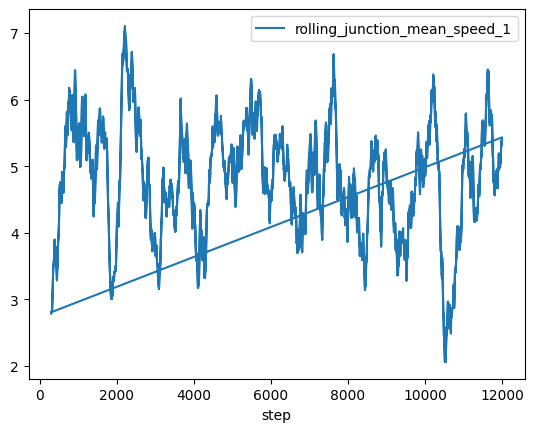

In [48]:
df_final_dataset.plot(x="step",y="rolling_junction_mean_speed_1")

<AxesSubplot:xlabel='step'>

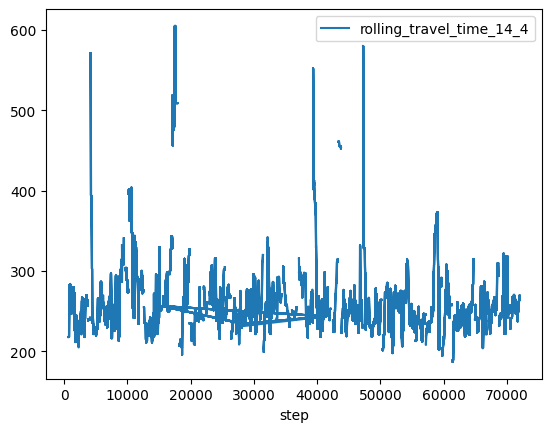

In [39]:
df.plot(x="step",y="rolling_travel_time_14_4")

<AxesSubplot:xlabel='step'>

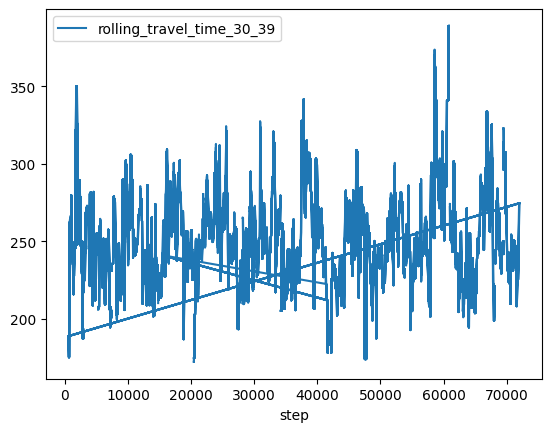

In [40]:
df.plot(x="step",y="rolling_travel_time_30_39")

<AxesSubplot:xlabel='step'>

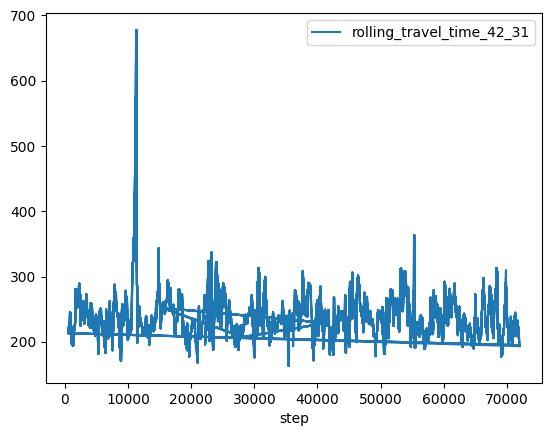

In [41]:
df.plot(x="step",y="rolling_travel_time_42_31")

<AxesSubplot:xlabel='step'>

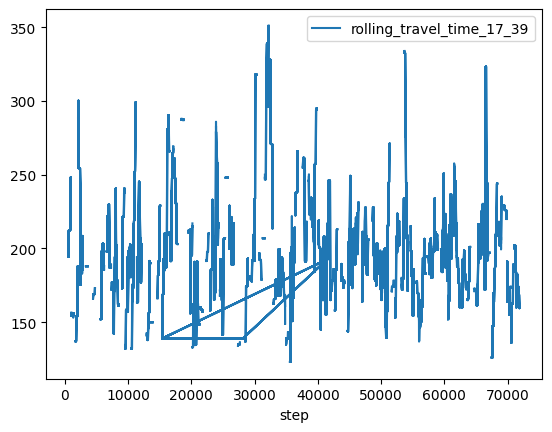

In [42]:
df.plot(x="step",y="rolling_travel_time_17_39")